# Simulate SLD distribution and R(Q)

In [2]:
import sys
import os
import numpy as np
np.random.seed(42)

import json
import tensorflow as tf

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')


In [3]:
# Directory in which the code sits
git_dir = os.path.join(os.path.expanduser('~'), 'git', 'vae-sld')

#config_file = os.path.join(git_dir, 'scripts', 'config-a_si-air.json')
config_file = os.path.join(git_dir, 'scripts', 'config-cell-b.json')
#config_file = os.path.join(git_dir, 'scripts', 'config-erik.json')
with open(config_file, 'r') as fd:
    config = json.load(fd)

data_dir = config['data_dir']
train_dir = config['train_dir']
model_name = config['name']

# Add source to path
sys.path.append(config['src_dir'])
sys.path.append(os.path.join(config['src_dir'], 'src'))

import reflectivity_model
import network
import importlib

importlib.reload(network)

<module 'network' from '/Users/m2d/git/vae-sld/src/network.py'>

In [48]:
importlib.reload(reflectivity_model)

with open(config_file, 'r') as fd:
    config = json.load(fd)

m = reflectivity_model.ReflectivityModels(q=None, name=config['name'],
                                          max_thickness=config['max_thick'],
                                          dz=config['dz'])

m.model_description = config['model']
m.parameters = config['parameters']

m.generate(10)

if config['use_errors']:
    ref_data = np.loadtxt(config['data_ref']).T
    _err = ref_data[2] / ref_data[1]
    errors = np.interp(m.q, ref_data[0], _err)
    train_pars, train_data = m.get_preprocessed_data(errors=errors)
else:
    train_pars, train_data = m.get_preprocessed_data()

print(train_pars[0].shape, train_data[0].shape)
i_test = 0

Computing reflectivity
(200,) (150,)


# Get the training data in R(Q) and retrieve the error

Item: 1


<IPython.core.display.Javascript object>


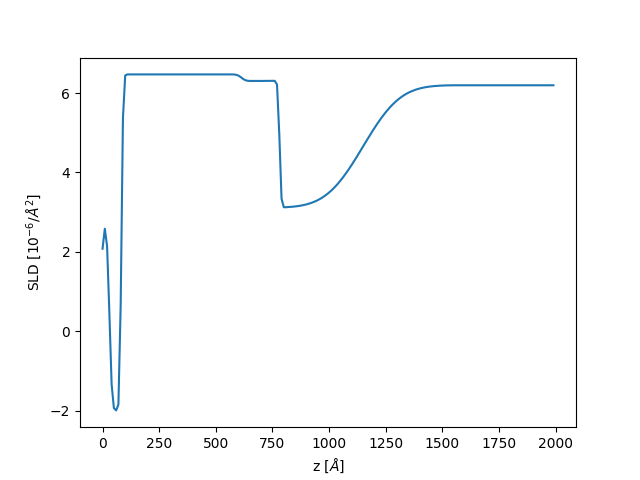

<IPython.core.display.Javascript object>


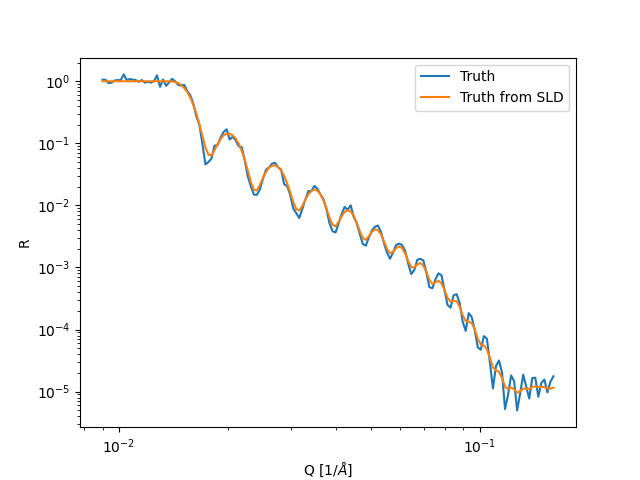

In [49]:
importlib.reload(reflectivity_model)

i_test +=1

print("Item: %s" % i_test)

#z = np.arange(config_val['z_left'], config_val['z_right']+config_val['dz'], config_val['dz'])
z = np.arange(0, config['dz']*len(train_pars[i_test]), config['dz'])


fig = plt.figure(dpi=100)
plt.plot(z, train_pars[i_test], label="Truth")
#plt.gca().legend()
plt.xlabel('z [$\AA$]')
plt.ylabel('SLD [$10^{-6}/\AA^2$]')
plt.show()


r_true_sld = reflectivity_model.calculate_reflectivity_from_profile(m.q, z, train_pars[i_test])
r_true = np.power(10, train_data[i_test])*m.q[0]**2/m.q**2


fig = plt.figure(dpi=100)
plt.plot(m.q, r_true, label="Truth")
plt.plot(m.q, r_true_sld, label="Truth from SLD")

plt.gca().legend()
plt.xlabel('Q [$1/\AA$]')
plt.ylabel('R')
plt.xscale('log')
plt.yscale('log')
plt.show()

